In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

/Applications/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Loading

In [2]:
# load data xlsx file
df = pd.read_excel('Midterm Project.xlsx')
df

,sex,age,Time of laser treatement,number of skin tags,Type of skin tags,Total area of tags in square mm,Result of treatment
0,2,16.0,8.50,1,2,60,1
1,1,28.0,4.75,3,1,100,1
2,2,40.0,9.75,1,22,80,0
3,1,30.0,2.50,2,1,115,1
4,2,34.0,12.00,3,3,95,0
...,...,...,...,...,...,...,...
85,2,23.0,11.75,12,3,72,0
86,2,27.0,8.75,2,1,6,0
87,2,15.0,4.25,1,1,6,1
88,2,18.0,5.75,1,1,80,1


# Exploratory Data Analysis

In [3]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sex                              90 non-null     int64  
 1   age                              87 non-null     float64
 2   Time of laser  treatement        87 non-null     float64
 3   number of skin tags              90 non-null     int64  
 4   Type of skin tags                90 non-null     int64  
 5   Total area of tags in square mm  90 non-null     int64  
 6   Result of treatment              90 non-null     int64  
dtypes: float64(2), int64(5)
memory usage: 5.0 KB


In [4]:
# show the data types of each column in the dataset
df.dtypes

sex                                  int64
age                                float64
Time of laser  treatement          float64
number of skin tags                  int64
Type of skin tags                    int64
Total area of tags in square mm      int64
Result of treatment                  int64
dtype: object

In [5]:
#show the summary statistics of the dataset
df.describe()

,sex,age,Time of laser treatement,number of skin tags,Type of skin tags,Total area of tags in square mm,Result of treatment
count,90.000000,87.000000,87.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.701149,8.695402,5.511111,2.866667,93.477778,1.977778
std,0.502304,13.530426,11.628918,3.567155,5.363631,150.247229,11.734878
min,1.000000,15.000000,0.000000,1.000000,1.000000,-6.000000,0.000000
25%,1.000000,18.000000,4.500000,2.000000,1.000000,20.000000,0.000000
50%,1.000000,27.000000,8.250000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.750000,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,111.000000,12.000000,33.000000,770.000000,111.000000


In [6]:
# show  counts of values for each column in the dataset
df.value_counts()

sex  age   Time of laser  treatement  number of skin tags  Type of skin tags  Total area of tags in square mm  Result of treatment
2    34.0  12.00                      3                    3                  95                               0                      2
1    15.0  3.50                       2                    1                  4                                1                      1
           4.00                       7                    1                  6                                111                    1
           5.50                       5                    1                  6                                1                      1
     16.0  10.25                      3                    20                 60                               1                      1
                                                                                                                                     ..
2    40.0  9.75                       1              

array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Time of laser  treatement'}>],
       [<AxesSubplot:title={'center':'number of skin tags'}>,
        <AxesSubplot:title={'center':'Type of skin tags'}>,
        <AxesSubplot:title={'center':'Total area of tags in square mm'}>],
       [<AxesSubplot:title={'center':'Result of treatment'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

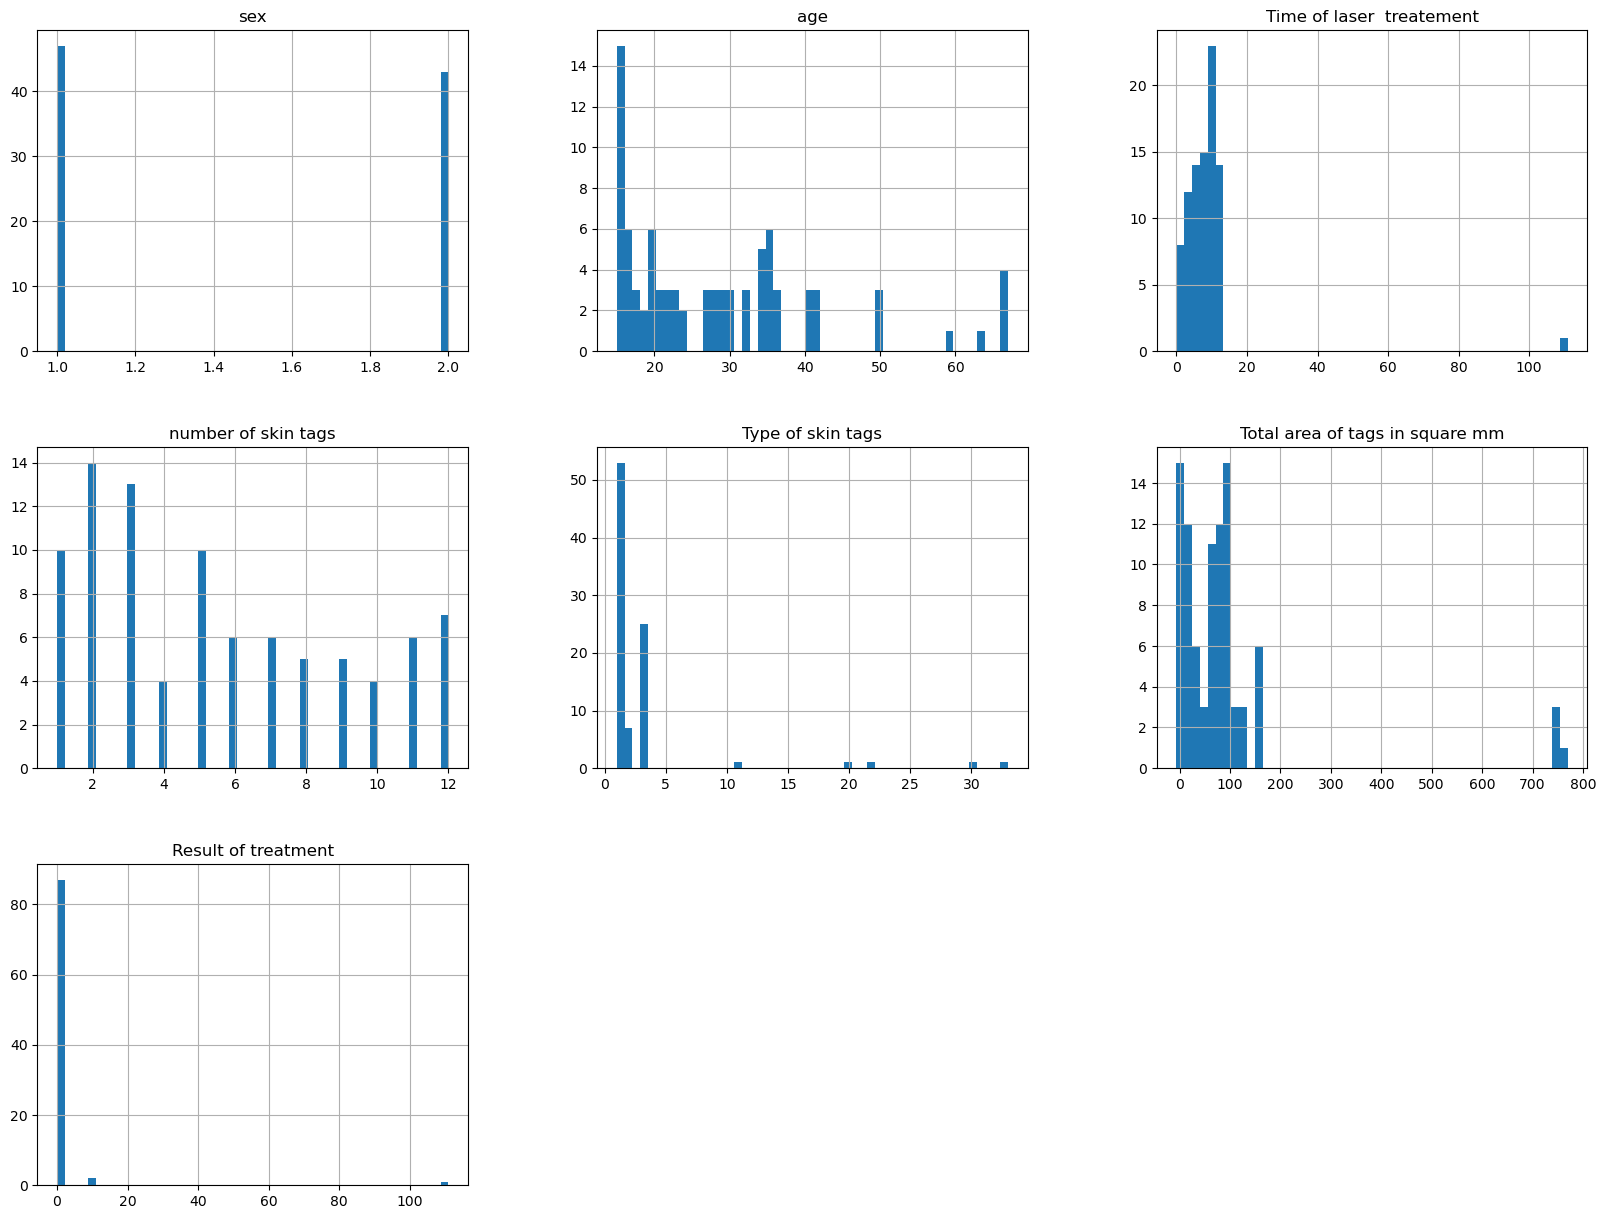

In [7]:
## plot histogram for dataset
df.hist( bins=50, figsize=(20,15))

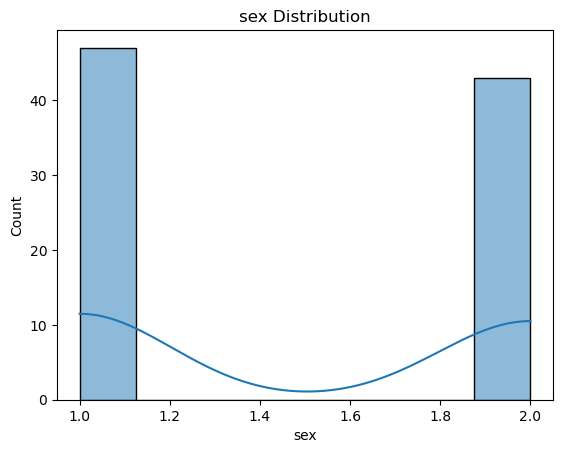

In [8]:
## Plot a histogram of the SEX column 
sns.histplot(df['sex'], kde=True)
plt.title('sex Distribution')
plt.show()

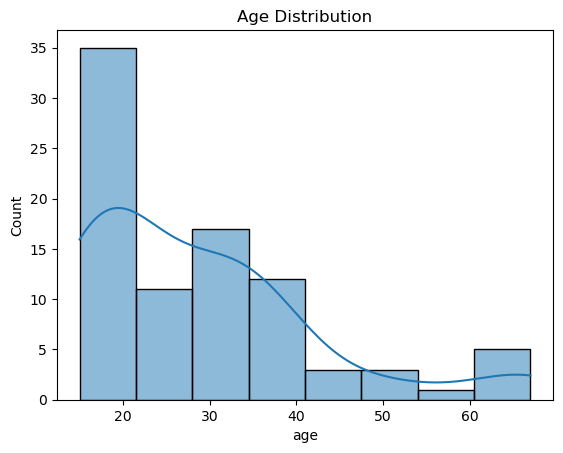

In [9]:
## Plot a histogram of the AGE column
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

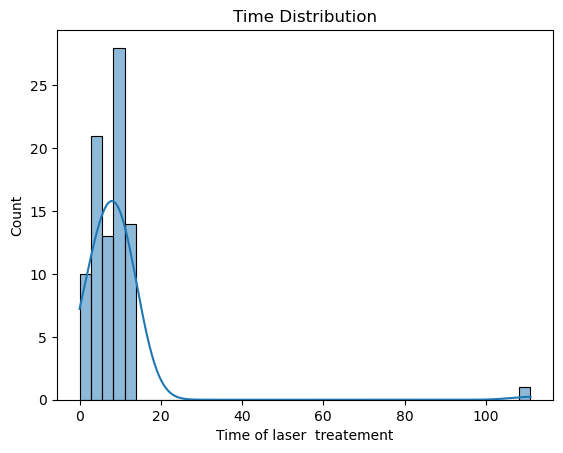

In [10]:
#Plot a histogram of the Time of laser treatement column
sns.histplot(df['Time of laser  treatement'], kde=True)
plt.title('Time Distribution')
plt.show()

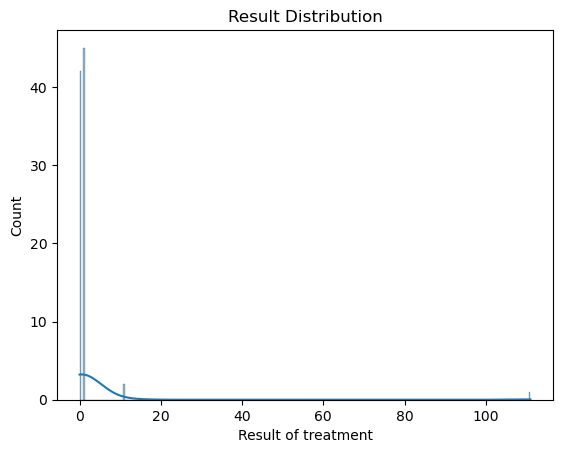

In [11]:
#Plot a histogram of the Result of treatment column
sns.histplot(df['Result of treatment'], kde=True)
plt.title('Result Distribution')
plt.show()

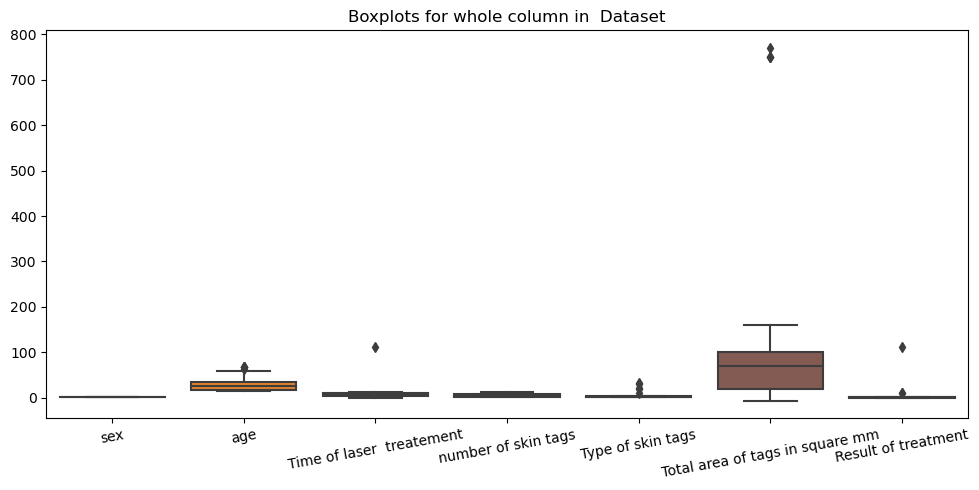

In [12]:
#figure's size for the boxplot
plt.figure(figsize=(10, 5))

# Create boxplots for dataset
sns.boxplot(data=df)

# write the title and show the plot
plt.title('Boxplots for whole column in  Dataset')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

The dataset describes skin tags and therapies and has 90 entries spread across 7 columns. The columns that comprise the data are 'Sex' , 'Age' , 'Time of Laser Treatment' , 'Number of Skin Tags' , 'Type of Skin Tags', 'Total Area of Tags in Square mm' , and 'Result of Treatment'.

# Data Cleaning

In [13]:
# Check for missing values in whole columns of the dataset
df.isnull().sum()

sex                                0
age                                3
Time of laser  treatement          3
number of skin tags                0
Type of skin tags                  0
Total area of tags in square mm    0
Result of treatment                0
dtype: int64

In [14]:
# Fill the missing values in the AGE column with mean 
df['age'] = df['age'].fillna(df['age'].mean())
# Fill the missing values in the Time of laser treatement column with mean 
df['Time of laser  treatement'] = df['Time of laser  treatement'].fillna(df['Time of laser  treatement'].mean())

In [15]:
#Make sure that any missing values have been filled in
df.isnull().sum()

sex                                0
age                                0
Time of laser  treatement          0
number of skin tags                0
Type of skin tags                  0
Total area of tags in square mm    0
Result of treatment                0
dtype: int64

In [16]:
# Replace 111 and 11 in the Result of treatment column into 1
df['Result of treatment'] = df['Result of treatment'].replace({111: 1, 11: 1})

In [17]:
#show the count of unique values in the Result of treatment column
df['Result of treatment'].value_counts()

1    48
0    42
Name: Result of treatment, dtype: int64

In [18]:
# Calculate the first quartile in df
q1 = df.quantile(0.25)
# Calculate the third quartile in df
q3 = df.quantile(0.75)
#Compute the interquartile range
outliers = q3 - q1
#Remove any column's rows with values that are beyond the IQR range
df = df[~((df < (q1 - 1.5 * outliers)) | (df > (q3 + 1.5 * outliers)))]


In [19]:
#Check to see if, following outlier elimination, any missing data were introduced.
df.isnull().sum()

sex                                0
age                                0
Time of laser  treatement          0
number of skin tags                0
Type of skin tags                  0
Total area of tags in square mm    0
Result of treatment                0
dtype: int64

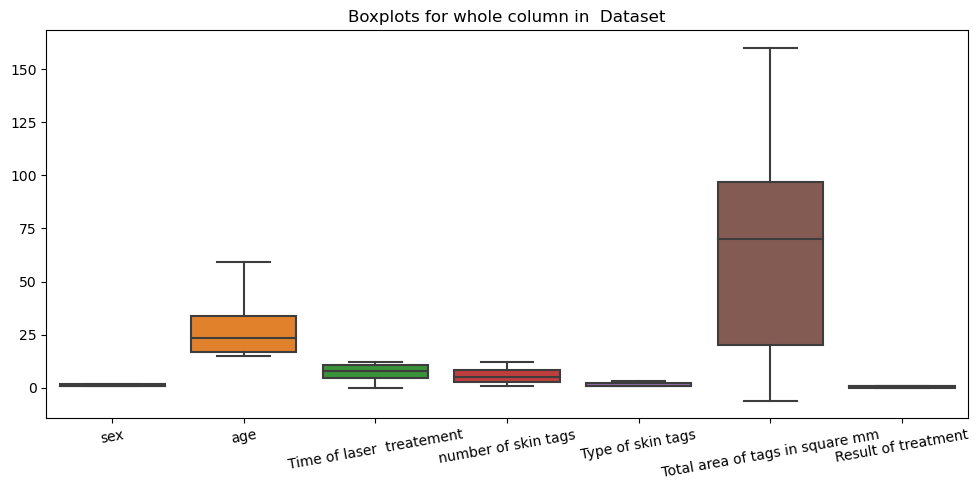

In [20]:
#figure's size for the boxplot
plt.figure(figsize=(10, 5))

# Create boxplots for dataset
sns.boxplot(data=df)

# write the title and show the plot
plt.title('Boxplots for whole column in  Dataset')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Model Training

In [48]:
# Separate feature columns and target column
# We have freedom to chose features on which we want to train our model
X = df[['sex','age','Time of laser  treatement','Type of skin tags','Total area of tags in square mm']]# feature columns
y = df['Result of treatment'] # target column 

In [49]:
#split the dataset into testing and training sets (testing at 30% and training at 70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic Regression

In [50]:
# First model is Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 
model.fit(X_train,y_train) # Fit the model

LogisticRegression()

In [51]:
# cross-validation on Logistic Regression
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-scores)
model_rmse_scores


array([0.        , 0.5       , 0.        , 0.35355339, 0.35355339,
       0.35355339, 0.37796447, 0.37796447, 0.53452248, 0.        ])

In [52]:
# prediction for Logistic Regression model
predictions = model.predict(X_test)
predictions


array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1])

In [53]:
# length of predictions made by the Logistic Regression model
len(predictions)

23

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
# Model Evaluation for Logistic Regression
## show the accuracy score for the Logistic Regression model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the Logistic Regression model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the Logistic Regression model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.9565217391304348
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.93      0.97        15

    accuracy                           0.96        23
   macro avg       0.94      0.97      0.95        23
weighted avg       0.96      0.96      0.96        23

[[ 8  0]
 [ 1 14]]


/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


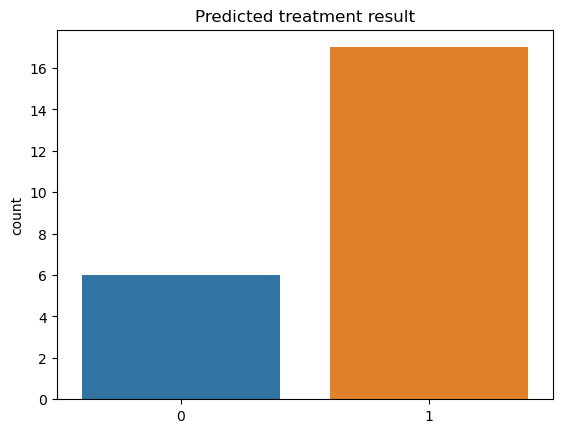

In [74]:
# Visualize the count of predictions made by the  Logistic Regression model
sns.countplot(predictions)
plt.title('Predicted treatment result')
plt.show()

The plot represents the treatment outcomes that a logistic regression model predicts. The orange and blue bars, respectively, depict the two outcomes, 1 and 0. As indicated by the orange bar, the outcome "1" has a greater count, indicating that the model more commonly predicts this outcome

In [55]:
# ROC AUC for Logistic Regression
roc_auc_score(y_test, predictions)

0.9666666666666667

# Decision Tree

In [75]:
# Second model is Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
# Fit the training Decision Tree model 
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
# Prediction for Decision Tree model
predictions = DT.predict(X_test)
predictions

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1])

In [77]:
# length of predictions made by the Decision Tree model
len(predictions)

23

In [78]:
# Model Evaluation Decision Tree
#show the accuracy score for the  Decision Tree model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the  Decision Tree model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the  Decision Tree model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.9130434782608695
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.87      0.93        15

    accuracy                           0.91        23
   macro avg       0.90      0.93      0.91        23
weighted avg       0.93      0.91      0.91        23

[[ 8  0]
 [ 2 13]]


In [79]:
# ROC AUC for Decision Tree
roc_auc_score(y_test, predictions)

0.9333333333333333

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


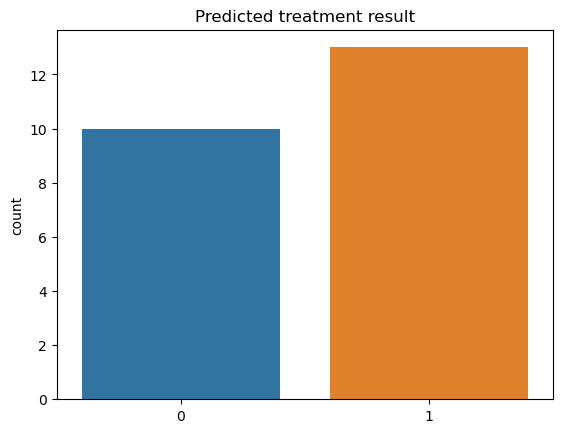

In [80]:
# Visualize the count of predictions made by the Decision Tree model
sns.countplot(predictions)
plt.title('Predicted treatment result')
plt.show()

The decision tree model's  treatment outcomes are shown in the chart. Blue and orange bars are used to represent the results, which are labelled as 0 and 1, respectively. The orange bar denoting outcome "1" has a higher count, indicating that the decision tree model more frequently predicts this outcome

In [81]:
# cross-validation on Decision Tree
scores = cross_val_score(DT, X, y, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-scores)
model_rmse_scores

array([0.5       , 0.61237244, 0.        , 0.35355339, 0.35355339,
       0.35355339, 0.        , 0.37796447, 0.        , 0.        ])

# SVM

In [82]:
# Final model is SVM
from sklearn import svm
svm = svm.SVC()
# Fit the training SVM model 
svm.fit(X_train, y_train)

SVC()

In [83]:
# Prediction for SVM model
predictions = svm.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1])

In [84]:
## length of predictions made by the svm model
len(predictions)

23

In [85]:
# Model Evaluation for SVM
##show the accuracy score for the  svm model's predictions on the test set
print(accuracy_score(y_test,predictions))
#show the classification_report for the  svm model's predictions on the test set
print(classification_report(y_test,predictions))
#show the confusion_matrix for the  svm model's predictions on the test set
print(confusion_matrix(y_test,predictions))

0.6521739130434783
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.71      0.80      0.75        15

    accuracy                           0.65        23
   macro avg       0.60      0.59      0.59        23
weighted avg       0.63      0.65      0.64        23

[[ 3  5]
 [ 3 12]]


In [86]:
## ROC AUC for SVM
roc_auc_score(y_test, predictions)

0.5875

In [87]:
# cross-validation on SVM
scores = cross_val_score(svm, X, y, scoring="neg_mean_squared_error", cv=10)
model_rmse_scores = np.sqrt(-scores)
model_rmse_scores

array([0.35355339, 0.61237244, 0.61237244, 0.35355339, 0.70710678,
       0.70710678, 0.37796447, 0.65465367, 0.65465367, 0.65465367])

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


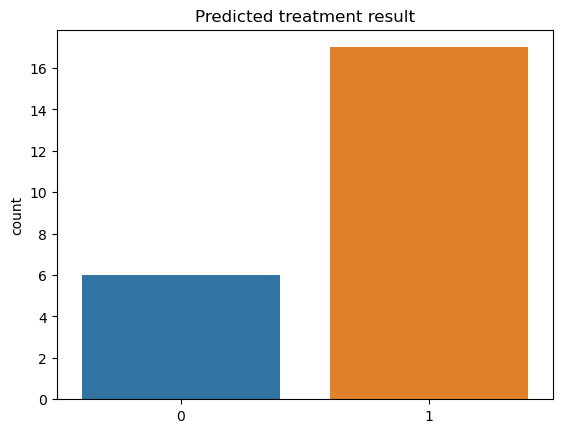

In [88]:
#Visualize the count of predictions made by the svm model
sns.countplot(predictions)
plt.title('Predicted treatment result')
plt.show()

The plot represents the treatment outcomes that a svm model predicts. The orange and blue bars, respectively, depict the two outcomes, 1 and 0. As indicated by the orange bar, the outcome "1" has a greater count, indicating that the model more commonly predicts this outcome

# Performance Comparison

In [91]:
# evaluation  on  cross- validation 
final_scores = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
final_rmse_scores = np.sqrt(-final_scores)
display_score(final_rmse_scores)

Scores:  [0.4472136 0.        0.        0.        0.5      ]
Mean:  0.18944271909999158
Standard deviation:  0.23261869267107851


With accuracy of 95.6 percent and ROC AUC of 96.6 percent, logistic regression excels. The Decision Tree comes in second with 93% ROC AUC and 91% accuracy. With a 65% accuracy and 58% ROC AUC, SVC significantly trails behind. Clearly, of the three options, Logistic Regression is the best fit for this dataset.

# Recommendation

The dataset was loaded and a thorough statistical analysis was conducted to understand the subtleties of data distribution and structure before we began our Data Analysis and Model Evaluation. The process of data cleansing was quite thorough: three items in the "Time of laser treatment" column and the "Age" column in particular were missing data. We used mean imputation as a way to correct this. In addition, possible outliers were addressed to strengthen the data's robustness after they were found using the Interquartile Range (IQR) approach. A fascinating finding was that numbers 11 and 111 were found in the "Result of treatment" column. To provide uniform data representation, they were standardized and swapped out with the number 1.

Since visualization is an essential stage, a boxplot was created to clearly show the distribution of the data and identify any potential outliers. In order to separate the data into training and test sets and distinguish between features and the target variable, the data had to be prepared for modelling. The three main prediction models under consideration were (SVM), Decision Tree, and Logistic Regression. Metrics including accuracy, classification reports, and the ROC-AUC score were the main focus of our investigation while evaluating each of these models.

After evaluating the models, we concluded that the Logistic Regression model was the best. Logistic regression performs exceptionally well, with a ROC AUC of 96.6 percent and an accuracy of 95.6 percent. In second place with a ROC AUC of 93% and an accuracy of 91% is the Decision Tree. SVC, however, lags somewhat behind with a ROC AUC of 58% and an accuracy of 65%. Logistic regression turned out to be the most appropriate model for this dataset out of the three that were examined.

Recommendation:
For better outcomes, it's advised to refine the SVC model via hyperparameter adjustments and kernel variations. A rigorous initial data quality check, particularly for anomalies like values 11 and 111, is imperative. Additionally, integrating advanced features and periodic model reassessments using fresh data will ensure sustained accuracy and relevance.